In [1]:
# Load Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd 

from sklearn.model_selection import train_test_split

# PCA

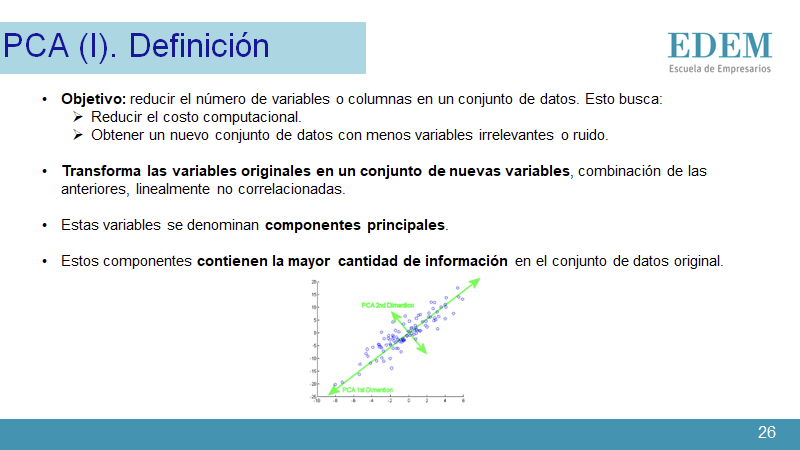

PCA puede utilizarse para realizar una reducción de la dimensionalidad y obtener un nuevo conjunto de datos más pequeño con dos posibles objetivos

- Disminuir el coste computacional


- Tener menos variables irrelevantes o ruido.

## Load Data

In [2]:
dat = pd.read_csv("../datasets/i2.csv", sep = ";")
dat = dat[["price", "ant"]].fillna(0) # Numerical variables with NAs replaced by 0 (not recommended!!!)
dat.head()

,price,ant
0,0.000000,0.0
1,147.500000,38.0
2,24.049999,19.0
3,59.709999,8.0
4,37.299999,4.0


Dividir en tren y val.

In [3]:
X_train, X_val = train_test_split(dat, test_size=0.3, random_state=1);


## PCA

Transforma las variables originales en un conjunto de nuevas variables, combinación de las anteriores, linealmente no correlacionadas.


Estas variables se denominan **componentes principales**.


Estos componentes son los que contienen más información del conjunto de datos original, es decir, representan las direcciones con más varianza o "movimiento" entre puntos.

In [4]:
# 1) Import model
from sklearn.decomposition import PCA

# 3) Define model
pca = PCA()

# 4) Train model
pca.fit(X_train)

# 5) Make "predictions"
dat_pca = pd.DataFrame(pca.transform(dat))
dat_pca

,0,1
0,-31.289498,-25.929007
1,115.456596,14.885620
2,-7.607357,-6.472422
3,28.256540,-16.788257
4,5.927158,-21.216214
...,...,...
995,-31.844249,3.065687
996,-32.035543,13.063857
997,-31.385145,-20.929922
998,-31.366016,-21.929739


Seleccionemos el número de componentes en función de la proporción de varianza explicada.

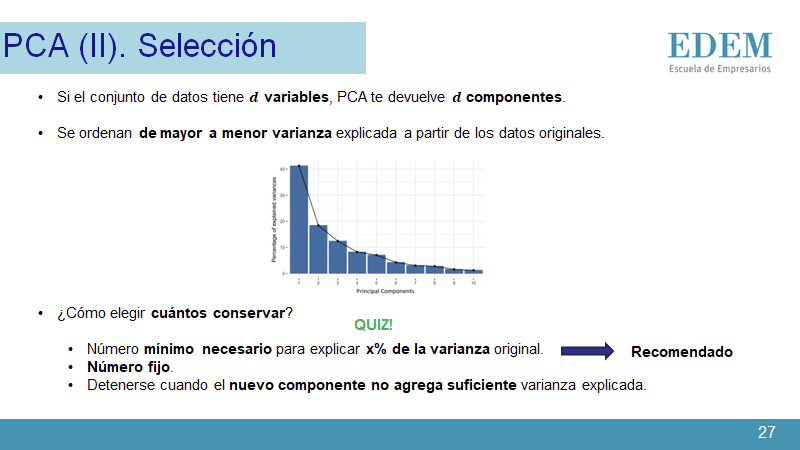

In [5]:
variance_explained = np.cumsum(pca.explained_variance_ratio_)
variance_explained

array([0.84325148, 1.        ])

In [6]:
threshold = 0.8
n_components = np.min(np.where(variance_explained > threshold)) + 1
dat_new = dat_pca.iloc[:,0:n_components]
dat_new

,0
0,-31.289498
1,115.456596
2,-7.607357
3,28.256540
4,5.927158
...,...
995,-31.844249
996,-32.035543
997,-31.385145
998,-31.366016


¡Todo junto ahora!

In [7]:
threshold = 0.8

# 3) Define model
pca = PCA()

# 4) Train model
pca.fit(X_train)

# 5) Make "predictions"
dat_pca = pd.DataFrame(pca.transform(dat))

variance_explained = np.cumsum(pca.explained_variance_ratio_)
n_components = np.min(np.where(variance_explained > threshold)) + 1
dat_new = dat_pca.iloc[:,0:n_components]
dat_new

,0
0,-31.289498
1,115.456596
2,-7.607357
3,28.256540
4,5.927158
...,...
995,-31.844249
996,-32.035543
997,-31.385145
998,-31.366016


## Kernel-PCA

Sigue la misma intuición que PCA, pero esta vez los componentes no están restringidos a ser lineales. Esto significa que puede realizar un aumento de la dimensionalidad además de una reducción de la misma utilizando kernel-PCA.

Puede elegir entre estos kernels:

- lineal


- poli


- rbf


- sigmoide


- coseno


- precalculado


In [8]:
from sklearn.decomposition import KernelPCA
?KernelPCA

In [9]:
threshold = 0.8
kernel = 'rbf'

# 3) Define model
pca = KernelPCA(kernel = kernel)

# 4) Train model
pca.fit(X_train)

# 5) Make "predictions"
dat_pca = pd.DataFrame(pca.transform(dat))

variance_explained = np.cumsum(pca.lambdas_) / np.sum(pca.lambdas_)
n_components = np.min(np.where(variance_explained > threshold)) + 1
dat_new = dat_pca.iloc[:,0:n_components]
dat_new

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,-0.109489,0.413084,0.390414,0.597827,-0.031412,-0.005823,-0.029699,-0.013380,0.023543,-0.098665,...,4.021193e-13,1.033453e-13,1.896816e-13,7.760112e-14,1.756754e-13,5.479731e-14,7.902802e-13,-9.068267e-15,2.022824e-13,-5.222194e-13
1,-0.090998,-0.035135,-0.031743,0.000304,-0.030444,-0.006538,-0.000169,0.006669,-0.024806,-0.012002,...,7.654289e-02,-5.421026e-02,4.049968e-04,8.347386e-03,-1.293729e-01,2.247085e-01,-3.483828e-01,-6.221022e-03,-4.580441e-02,1.708998e-02
2,-0.090381,-0.034842,-0.031353,0.000298,-0.029861,-0.006405,-0.000165,0.006510,-0.024168,-0.011690,...,-1.951564e-16,2.491063e-15,-1.307461e-14,6.817463e-16,-4.857226e-16,-1.491862e-16,2.250804e-16,2.281161e-15,1.333569e-15,1.038926e-14
3,-0.090178,-0.034743,-0.031216,0.000296,-0.029638,-0.006353,-0.000163,0.006444,-0.023897,-0.011556,...,-3.376810e-11,4.419189e-11,-5.724657e-11,9.372352e-12,-4.141000e-12,5.319475e-11,-3.516490e-11,4.310956e-11,-4.030740e-11,1.433591e-10
4,-0.092207,-0.035719,-0.032547,0.000316,-0.031736,-0.006836,-0.000178,0.007044,-0.026343,-0.012759,...,2.136746e-15,-3.152860e-15,4.218414e-15,-1.686151e-15,7.181755e-16,2.336673e-15,1.625870e-15,1.951564e-16,3.834389e-15,-4.504210e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.144164,-0.064716,-0.098745,0.035569,0.687031,-0.428464,-0.042839,0.038877,0.058148,0.031873,...,1.297104e-12,3.333664e-13,6.114631e-13,2.504516e-13,5.668166e-13,1.768143e-13,2.549147e-12,-2.928983e-14,6.524497e-13,-1.684774e-12
996,-0.119881,-0.050240,-0.058377,0.001374,-0.116392,0.003465,0.024123,0.550067,0.264132,0.122805,...,1.190002e-13,3.053357e-14,5.622391e-14,2.303713e-14,5.200354e-14,1.621316e-14,2.338814e-13,-2.698254e-15,5.984135e-14,-1.545213e-13
997,0.665170,-0.386472,0.335481,0.157687,0.030836,0.007694,0.018901,0.004041,-0.003912,0.091196,...,-8.202310e-13,-2.108331e-13,-3.868173e-13,-1.584843e-13,-3.584494e-13,-1.117023e-13,-1.612162e-12,1.855634e-14,-4.124921e-13,1.065254e-12
998,0.830973,-0.073046,-0.271427,0.205002,-0.016981,-0.003137,-0.015634,-0.007891,0.016247,-0.042754,...,6.152596e-13,1.580992e-13,2.900770e-13,1.186273e-13,2.688544e-13,8.387388e-14,1.209107e-12,-1.385350e-14,3.095076e-13,-7.990761e-13


## Definir Función

In [10]:
def pca_function(X, X_train, method = 'pca', threshold = 0.8, n_components = None, 
                 kernel = 'rbf'):
    if method == 'pca':
        # 3) Define model
        pca = PCA()

        # 4) Train model
        pca.fit(X_train)

        # 5) Make "predictions"
        dat_pca = pd.DataFrame(pca.transform(X))

        if n_components == None:
            variance_explained = np.cumsum(pca.explained_variance_ratio_)
            n_components = np.min(np.where(variance_explained > threshold)) + 1
            
    elif method == 'kernel-pca':
        
        # 3) Define model
        pca = KernelPCA(kernel = kernel)

        # 4) Train model
        pca.fit(X_train)

        # 5) Make "predictions"
        dat_pca = pd.DataFrame(pca.transform(X))

        if n_components == None:
            variance_explained = np.cumsum(pca.lambdas_) / np.sum(pca.lambdas_)
            n_components = np.min(np.where(variance_explained > threshold)) + 1    
    
    X = dat_pca.iloc[:,0:n_components]
    return X
        

In [11]:
dat_new = pca_function(dat, X_train)
dat_new

,0
0,-31.289498
1,115.456596
2,-7.607357
3,28.256540
4,5.927158
...,...
995,-31.844249
996,-32.035543
997,-31.385145
998,-31.366016


In [12]:
dat_new = pca_function(dat, X_train, threshold = 0.99)
dat_new

,0,1
0,-31.289498,-25.929007
1,115.456596,14.885620
2,-7.607357,-6.472422
3,28.256540,-16.788257
4,5.927158,-21.216214
...,...,...
995,-31.844249,3.065687
996,-32.035543,13.063857
997,-31.385145,-20.929922
998,-31.366016,-21.929739


In [13]:
dat_new = pca_function(dat, X_train, n_components = 2)
dat_new

,0,1
0,-31.289498,-25.929007
1,115.456596,14.885620
2,-7.607357,-6.472422
3,28.256540,-16.788257
4,5.927158,-21.216214
...,...,...
995,-31.844249,3.065687
996,-32.035543,13.063857
997,-31.385145,-20.929922
998,-31.366016,-21.929739


In [14]:
dat_new = pca_function(dat, X_train, method = 'kernel-pca', kernel = 'linear')
dat_new

,0
0,-31.289498
1,115.456596
2,-7.607357
3,28.256540
4,5.927158
...,...
995,-31.844249
996,-32.035543
997,-31.385145
998,-31.366016


In [15]:
dat_new = pca_function(dat, X_train, method = 'kernel-pca', n_components = 10)
dat_new

,0,1,2,3,4,5,6,7,8,9
0,-0.109489,0.413084,0.390414,0.597827,-0.031412,-0.005823,-0.029699,-0.013380,0.023543,-0.098665
1,-0.090998,-0.035135,-0.031743,0.000304,-0.030444,-0.006538,-0.000169,0.006669,-0.024806,-0.012002
2,-0.090381,-0.034842,-0.031353,0.000298,-0.029861,-0.006405,-0.000165,0.006510,-0.024168,-0.011690
3,-0.090178,-0.034743,-0.031216,0.000296,-0.029638,-0.006353,-0.000163,0.006444,-0.023897,-0.011556
4,-0.092207,-0.035719,-0.032547,0.000316,-0.031736,-0.006836,-0.000178,0.007044,-0.026343,-0.012759
...,...,...,...,...,...,...,...,...,...,...
995,-0.144164,-0.064716,-0.098745,0.035569,0.687031,-0.428464,-0.042839,0.038877,0.058148,0.031873
996,-0.119881,-0.050240,-0.058377,0.001374,-0.116392,0.003465,0.024123,0.550067,0.264132,0.122805
997,0.665170,-0.386472,0.335481,0.157687,0.030836,0.007694,0.018901,0.004041,-0.003912,0.091196
998,0.830973,-0.073046,-0.271427,0.205002,-0.016981,-0.003137,-0.015634,-0.007891,0.016247,-0.042754
